In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import zipfile

zip_path = '/content/archive.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for filename in zip_ref.namelist():
        print(filename)


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

superstore_final_dataset (1).csv


In [ ]:
store=pd.read_csv("/content/archive.zip",encoding='latin-1')
store

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


<Axes: >

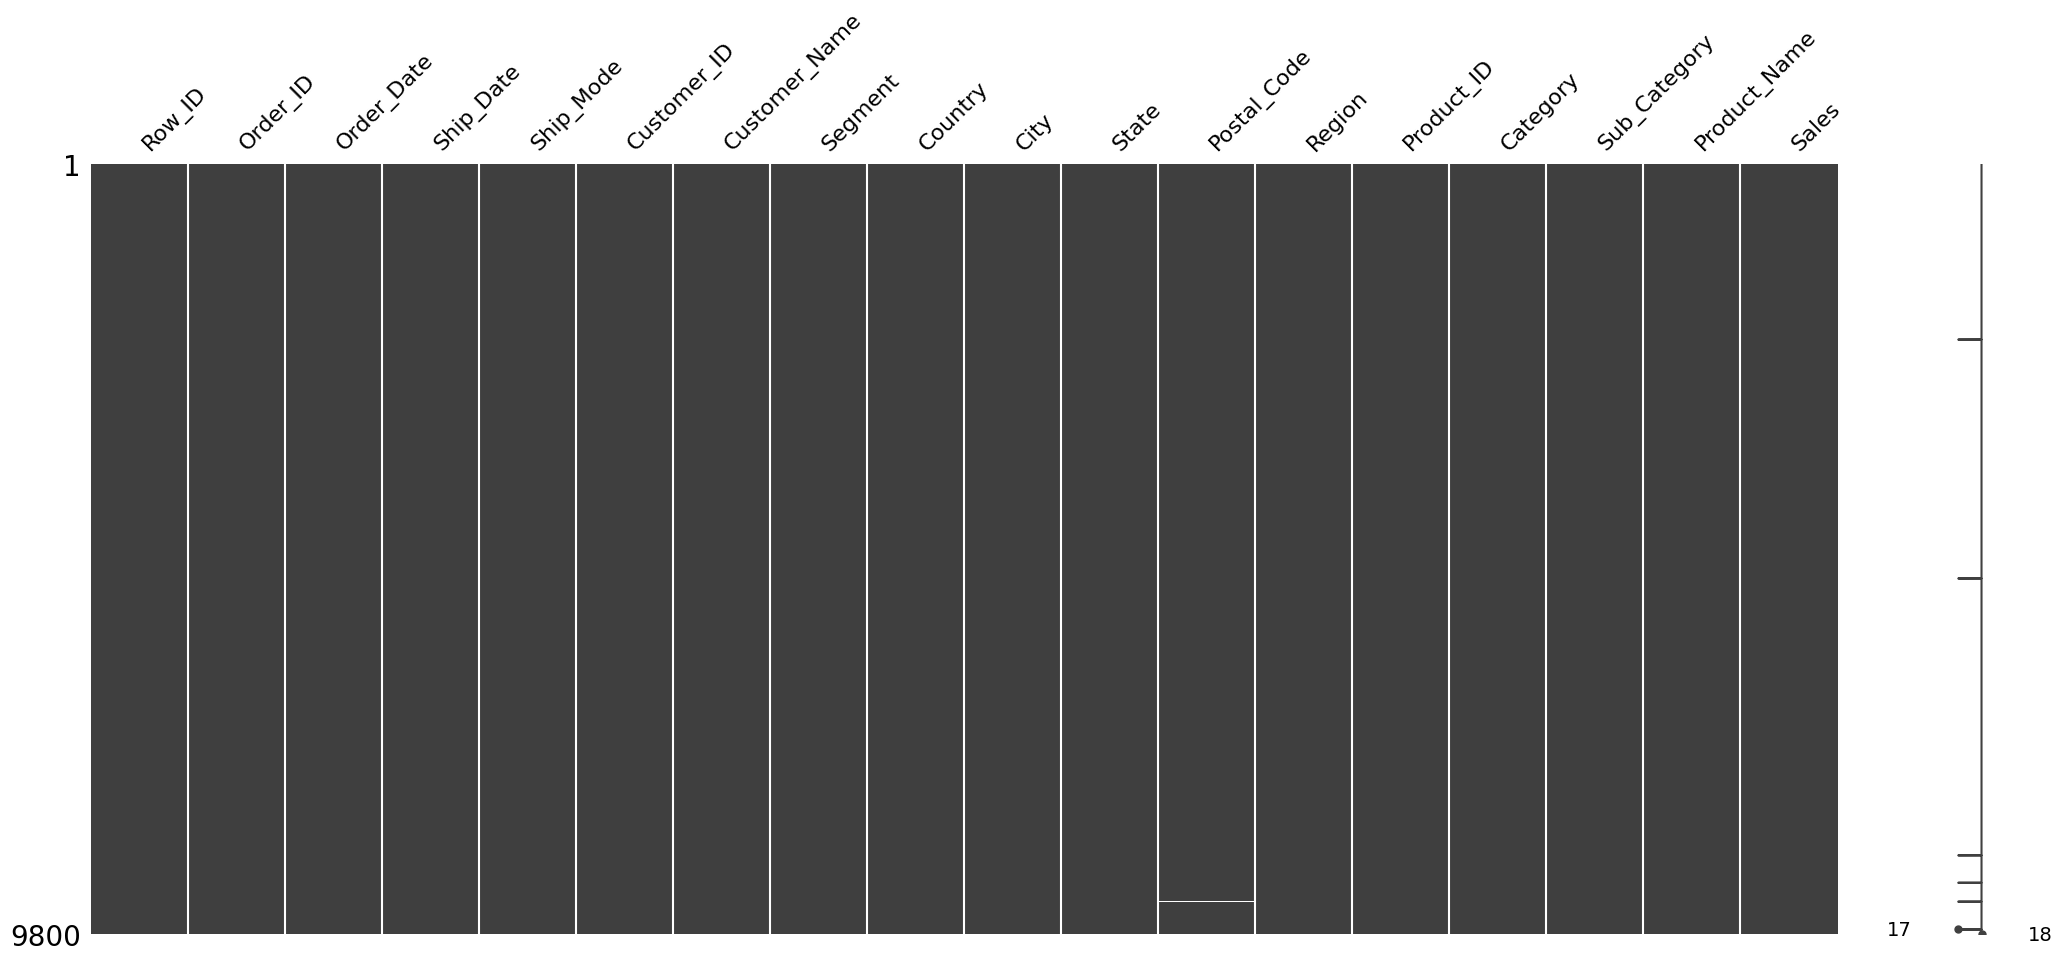

In [ ]:
import missingno as msno   # check for missing values
msno.matrix(store)

# **Explorative Data Analysis**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the first few rows of the dataset
print(store.head())

# Check the summary statistics of numerical columns
print(store.describe())

# Check data types and missing values
print(store.info())


   Row_ID        Order_ID  Order_Date   Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688   12/6/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer_Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3    Sean O Donnel   Consumer  United States  Fort Lauderdale     Florida   
4    Sean O Donnel   Consumer  United States  Fort Lauderdale     Florida   

   Postal_Code Region       Product_ID         Cat

# **Data Cleaning and Preprocessing**

In [ ]:
# Drop rows with missing values
store.dropna(inplace=True)

# Convert date columns to the appropriate data type
store['Order_Date'] = pd.to_datetime(store['Order_Date'])
store['Ship_Date'] = pd.to_datetime(store['Ship_Date'])


<ipython-input-9-72593ba1d985>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  store['Order_Date'] = pd.to_datetime(store['Order_Date'])
<ipython-input-9-72593ba1d985>:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  store['Ship_Date'] = pd.to_datetime(store['Ship_Date'])


# **Visualize Distributions and Relationships**

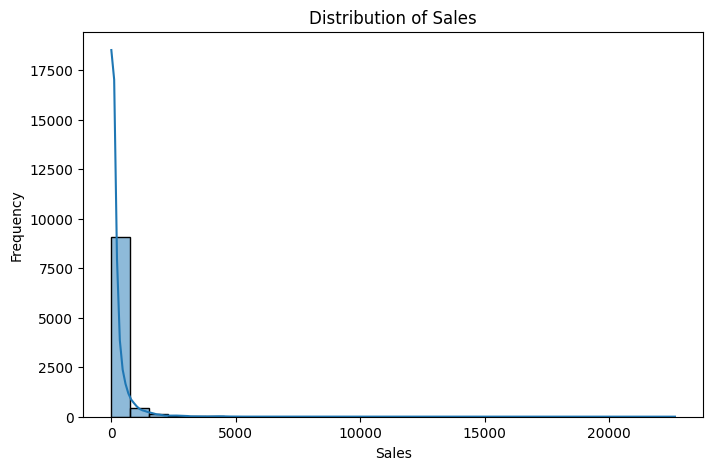

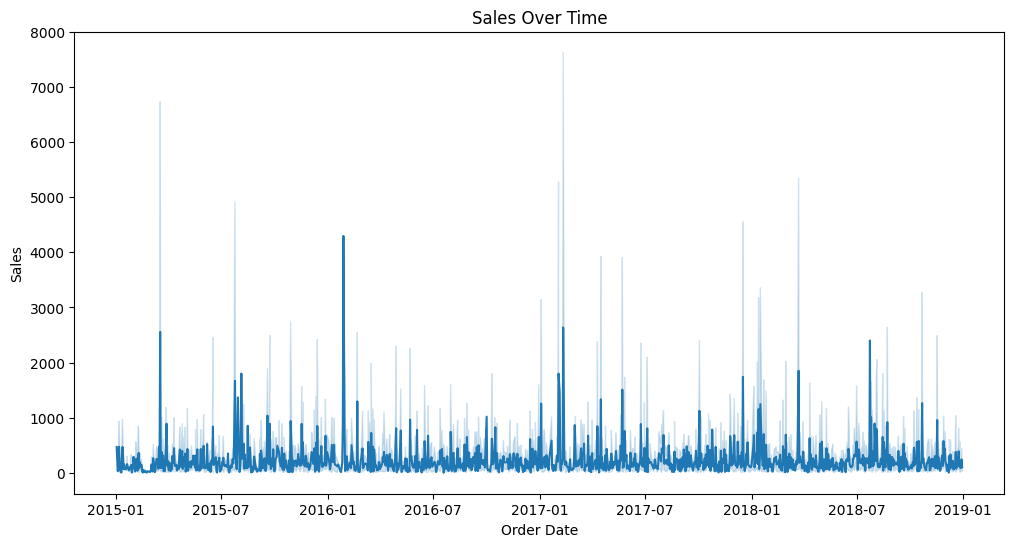

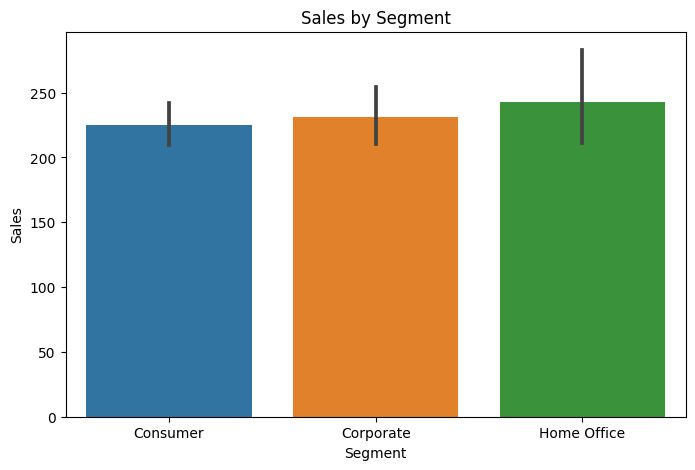

In [ ]:
# Visualize the distribution of Sales
plt.figure(figsize=(8, 5))
sns.histplot(store['Sales'], bins=30, kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# Visualize sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order_Date', y='Sales', data=store)
plt.title("Sales Over Time")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.show()

# Visualize sales by segment
plt.figure(figsize=(8, 5))
sns.barplot(x='Segment', y='Sales', data=store)
plt.title("Sales by Segment")
plt.xlabel("Segment")
plt.ylabel("Sales")
plt.show()


# **Explore Relationships with Pairplots and Correlation**

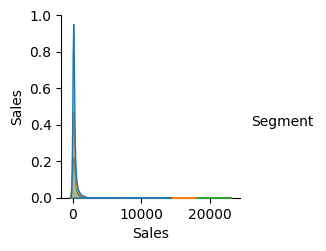

<ipython-input-11-60afdc9cfaa4>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = store.corr()


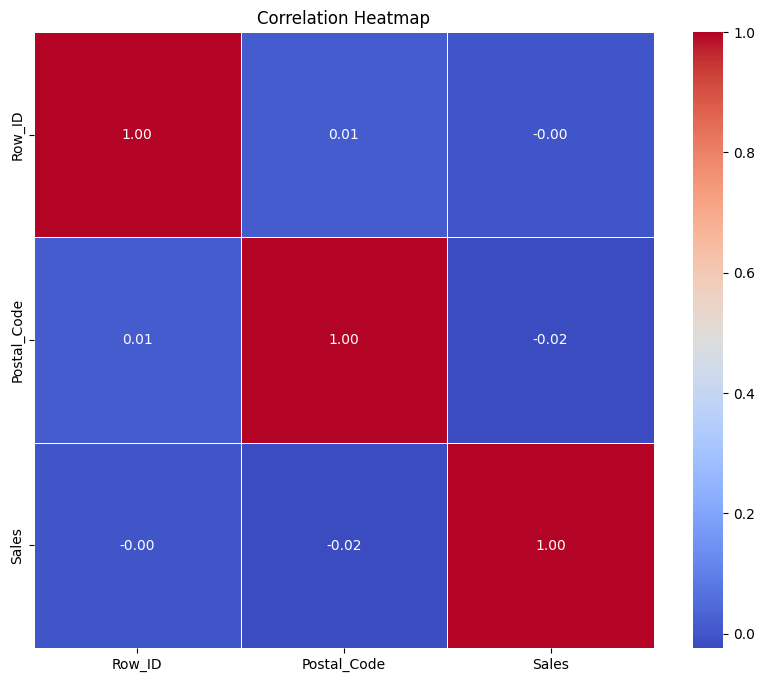

In [ ]:
# Pairplot for numerical variables
sns.pairplot(store, vars=['Sales'], hue='Segment', diag_kind='kde')
plt.show()

# Correlation heatmap
correlation_matrix = store.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# **Top Selling Products**

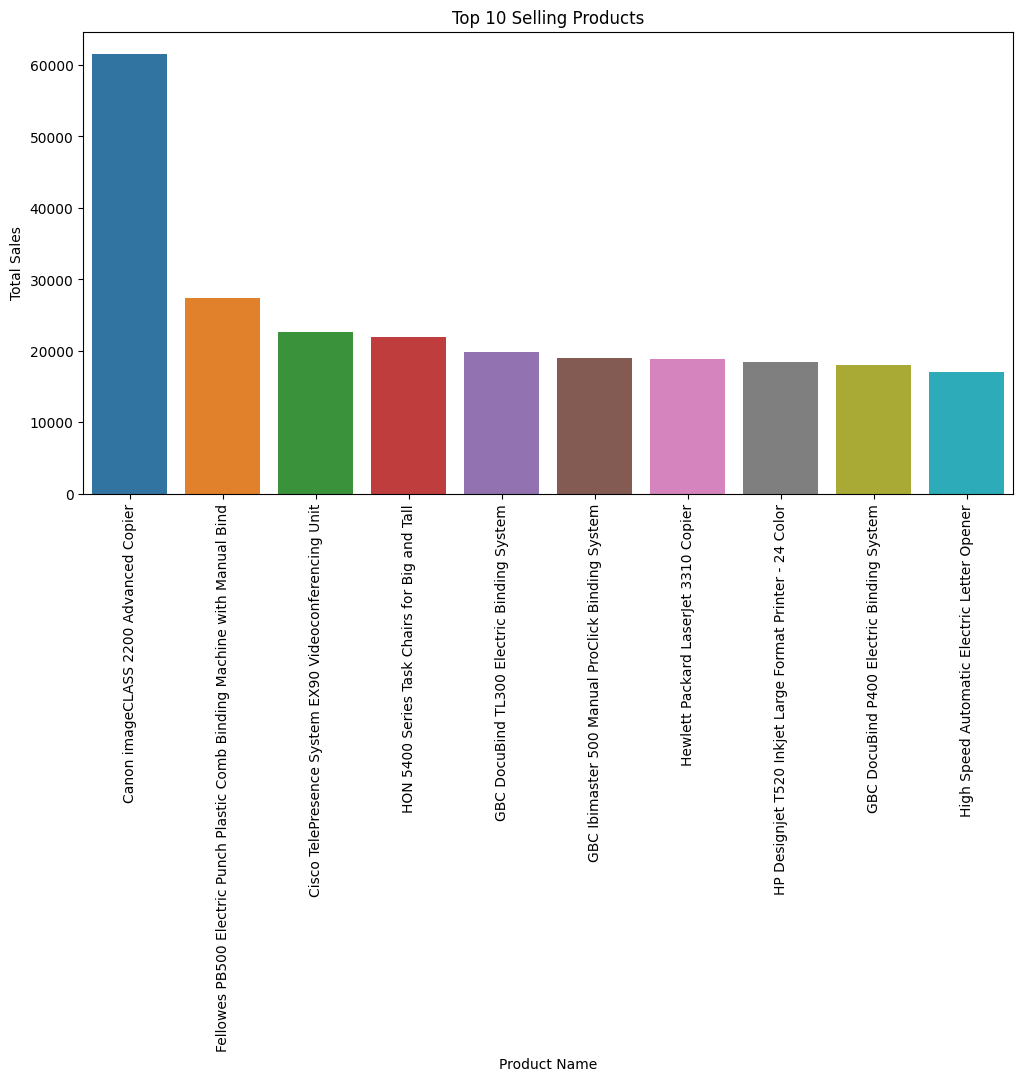

In [ ]:
top_products = store.groupby('Product_Name')['Sales'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.xticks(rotation=90)
plt.title("Top 10 Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.show()


# **Shipping Modes Analysis**

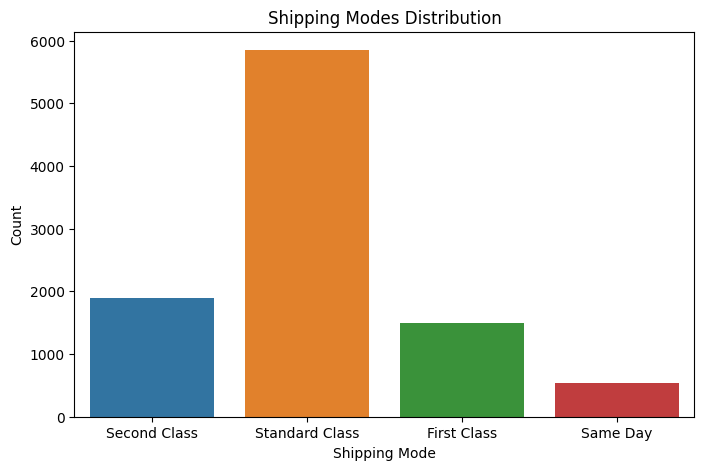

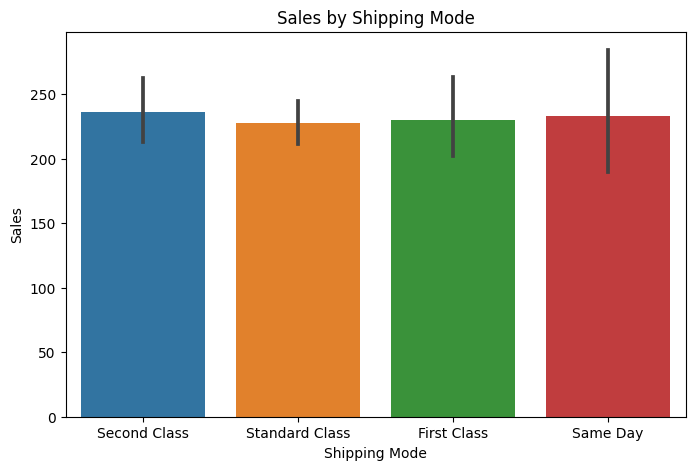

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Ship_Mode', data=store)
plt.title("Shipping Modes Distribution")
plt.xlabel("Shipping Mode")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='Ship_Mode', y='Sales', data=store)
plt.title("Sales by Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Sales")
plt.show()


# **Geographic Insights**

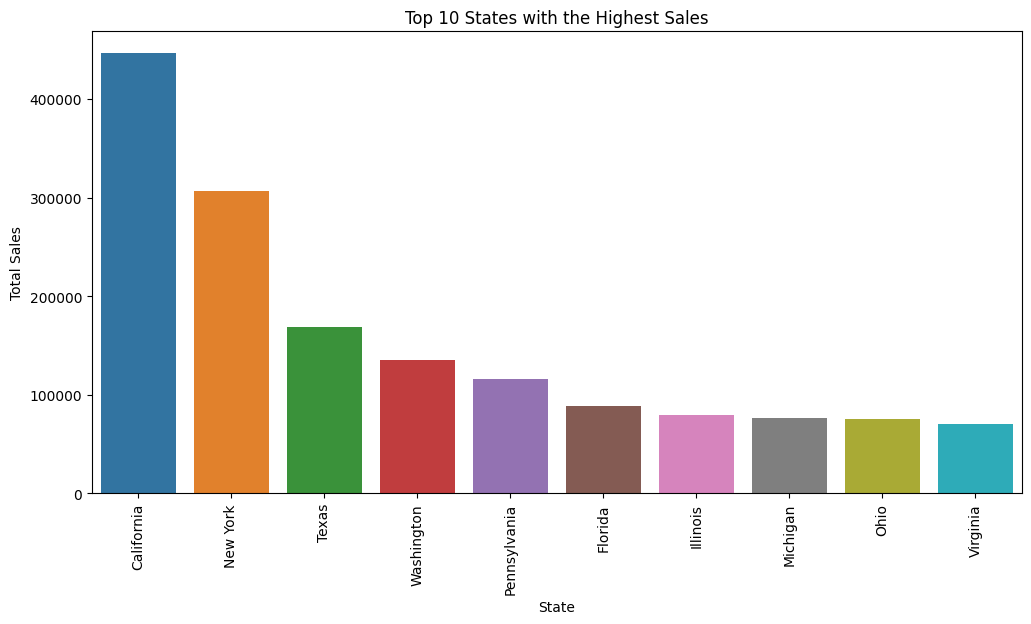

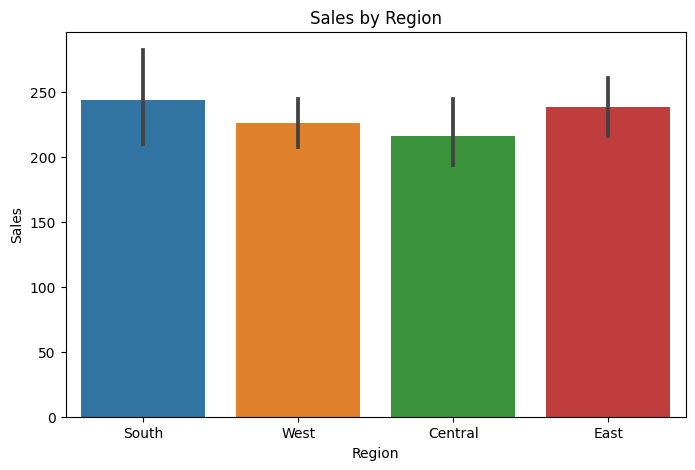

In [ ]:
# Top States with the highest sales
top_states = store.groupby('State')['Sales'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.xticks(rotation=90)
plt.title("Top 10 States with the Highest Sales")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.show()

# Sales by Region
plt.figure(figsize=(8, 5))
sns.barplot(x='Region', y='Sales', data=store)
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()


# **Customer Segmentation**

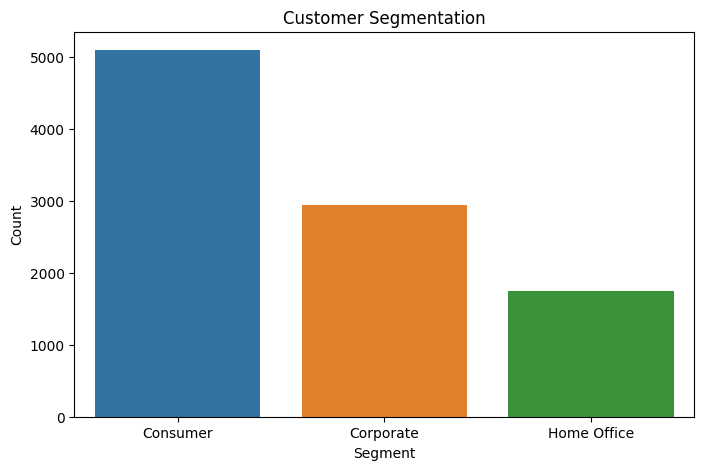

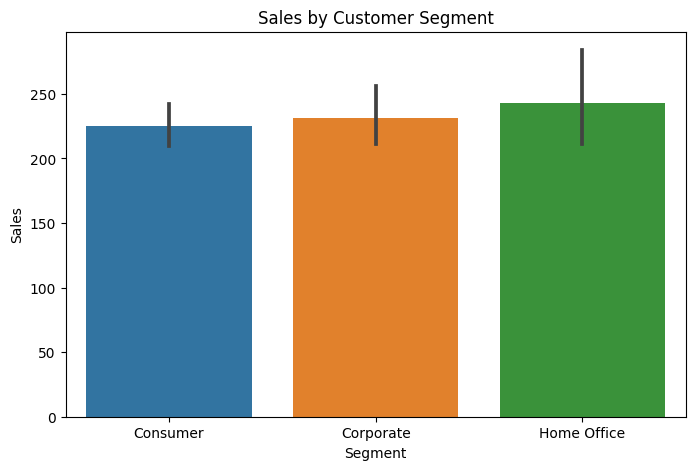

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Segment', data=store)
plt.title("Customer Segmentation")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='Segment', y='Sales', data=store)
plt.title("Sales by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Sales")
plt.show()


# **Time Series Analysis**

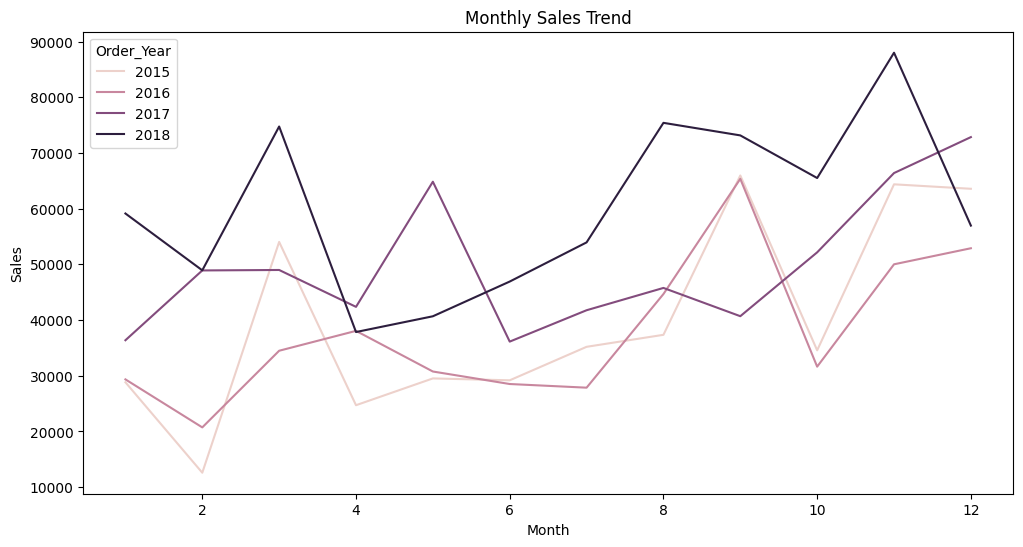

In [ ]:
# Extract month and year from the 'Order_Date'
store['Order_Month'] = store['Order_Date'].dt.month
store['Order_Year'] = store['Order_Date'].dt.year

# Monthly Sales Trend
monthly_sales_trend = store.groupby(['Order_Year', 'Order_Month'])['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order_Month', y='Sales', hue='Order_Year', data=monthly_sales_trend)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


# **Case Study**

**> Hypothesis: The shipping mode impacts the average sales amount for each order. We expect that certain shipping modes will have higher average sales compared to others.**

## **steps:**

**We will first conduct a hypothesis test to determine if there are statistically significant differences in the average sales amount based on different shipping modes. To do this, we'll use ANOVA (Analysis of Variance) test.**

**If the ANOVA test indicates that there are significant differences, we'll perform post-hoc analysis (e.g., Tukey's HSD test) to identify which shipping modes differ significantly in terms of average sales.**

ANOVA Test Results:
F-statistic: 0.07437771541761881
P-value: 0.9737696598907598
Result: Fail to Reject Null Hypothesis - There is no significant difference in average sales across different shipping modes.


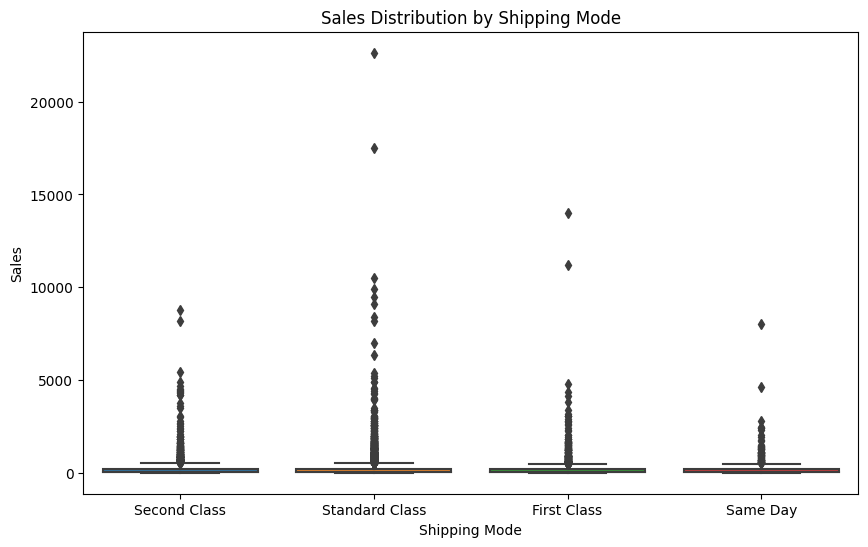

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the dataset
store = pd.read_csv("/content/archive.zip", encoding='latin-1')

# Hypothesis Testing - ANOVA Test
shipping_modes = store['Ship_Mode'].unique()
grouped_data = [store[store['Ship_Mode'] == mode]['Sales'] for mode in shipping_modes]

# Perform ANOVA test
f_stat, p_value = f_oneway(*grouped_data)
alpha = 0.05

print("ANOVA Test Results:")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Result: Reject Null Hypothesis - There are significant differences in average sales across different shipping modes.")
else:
    print("Result: Fail to Reject Null Hypothesis - There is no significant difference in average sales across different shipping modes.")

# Post-hoc Analysis (Tukey's HSD Test) - Only if ANOVA test result is significant
if p_value < alpha:
    # Combine the data for Tukey's test
    data_for_tukey = pd.DataFrame({'data': store['Sales'], 'group': store['Ship_Mode']})

    # Perform Tukey's HSD test
    tukey_result = pairwise_tukeyhsd(data_for_tukey['data'], data_for_tukey['group'])
    print("\nTukey's HSD Test Results:")
    print(tukey_result)

# Visualization of Sales by Shipping Mode
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ship_Mode', y='Sales', data=store)
plt.title("Sales Distribution by Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Sales")
plt.show()


**If the p-value is less than alpha, we reject the null hypothesis, indicating that there are significant differences in average sales across different shipping modes.**

**If the ANOVA test result is significant, we perform the Tukey's HSD test to identify which shipping modes have significantly different average sales. The Tukey's HSD test provides a pairwise comparison between different shipping modes.**




# **Machine Learning Study: Predicting Sales**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


# Drop rows with missing values in the 'Sales' column
store = store.dropna(subset=['Sales'])

# Select features and target variable
X = store.drop(columns=['Sales'])
y = store['Sales']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing steps for numeric and categorical features
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Define models
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)

# Create a dictionary to store the models and their names
models = {
    'Linear Regression': linear_model,
    'Decision Tree': decision_tree_model,
    'Random Forest': random_forest_model
}

results = {}

for name, model in models.items():
    # Create a pipeline with preprocessor and the current model
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Fit the model on the training data
    model_pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model_pipeline.predict(X_test)

    # Evaluate the model using MSE and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results in the dictionary
    results[name] = {'MSE': mse, 'R-squared': r2}

# Convert the results to a DataFrame for easier visualization
results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df)


                             MSE  R-squared
Linear Regression  622884.152557   0.068096
Decision Tree      556855.962988   0.166882
Random Forest      477157.649222   0.286119


## **Adding AUC ROC curve**

AUC ROC Score: 0.9195663510731081


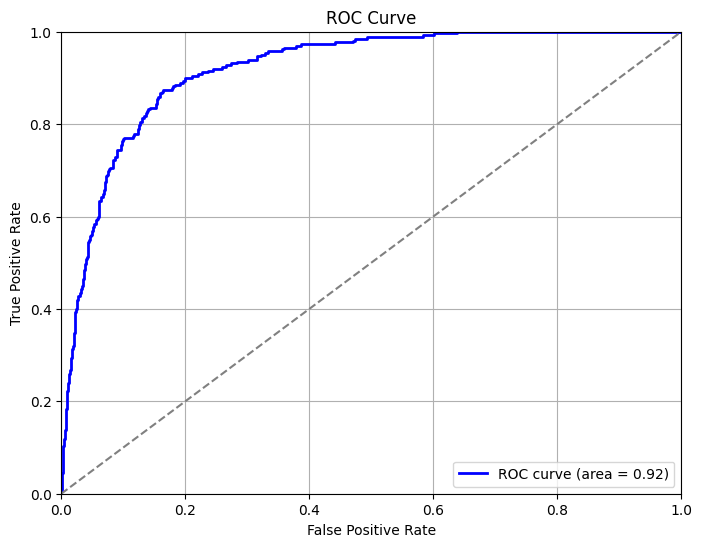

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer

# Drop rows with missing values in the 'Sales' column
store = store.dropna(subset=['Sales'])

# Define the target variable (whether a product is of interest or not)
store['Product_of_Interest'] = store['Sales'] > 500

# Select features and target variable
X = store.drop(columns=['Sales', 'Product_of_Interest'])
y = store['Product_of_Interest']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing steps for numeric and categorical features
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Create a logistic regression model with an increased number of iterations and 'saga' solver
logistic_model = LogisticRegression(random_state=42, max_iter=1000, solver='saga')

# Create a pipeline with preprocessor and the logistic regression model
logistic_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', logistic_model)
])

# Fit the logistic regression model on the training data
logistic_model_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred_proba = logistic_model_pipeline.predict_proba(X_test)[:, 1]

# Calculate the AUC ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC ROC Score:", auc_roc)

# Create the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - AUC ROC Score: 0.919505660004136
Random Forest - AUC ROC Score: 0.9097512565299095
SVM - AUC ROC Score: 0.8871539485159908


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


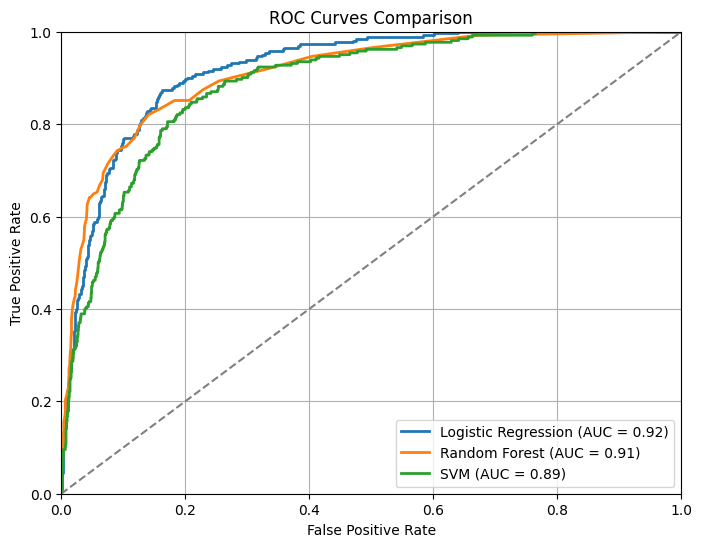

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer

# Drop rows with missing values in the 'Sales' column
store = store.dropna(subset=['Sales'])

# Define the target variable (whether a product is of interest or not)
store['Product_of_Interest'] = store['Sales'] > 500

# Select features and target variable
X = store.drop(columns=['Sales', 'Product_of_Interest'])
y = store['Product_of_Interest']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing steps for numeric and categorical features
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Create models
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(probability=True, random_state=42))
]

# Fit and evaluate models
results = []
for name, model in models:
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    model_pipeline.fit(X_train, y_train)
    y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    results.append((name, auc_roc))

# Print results
for name, auc_roc in results:
    print(f"{name} - AUC ROC Score: {auc_roc}")

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for name, model in models:
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    model_pipeline.fit(X_train, y_train)
    y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {auc_roc:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
